# Harshitha Bannur

## Research question:

**Is there a relationship between the gender of an employee and the importance they give and recieve to their mental health and care at their workplace?**

### Dataset Description:

##### What each of the columns in the data stand for:

- family_history: Do you have a family history of mental illness?

- treatment: Have you sought treatment for a mental health condition?

- work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

- no_employees: How many employees does your company or organization have?

- remote_work: Do you work remotely (outside of an office) at least 50% of the time?

- tech_company: Is your employer primarily a tech company/organization?

- benefits: Does your employer provide mental health benefits?

- care_options: Do you know the options for mental health care your employer provides?

- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

- anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

- leave: How easy is it for you to take medical leave for a mental health condition?

- mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

- phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

- coworkers: Would you be willing to discuss a mental health issue with your coworkers?

- supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

- mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

- phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

- mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

Among the many categories of analysis I was interested in regarding this dataset, I think I would like to focus on how the numbers between female and male workers vary amongst those who report mental health issues. I would also then like to compare these numbers to those who have care options and those who don't, along with the use of the data regarding 'mental-health consequence' to investigate how the importance workers give their mental health and how this varies among men and women in the workplace



To plan this, I'm thinking of dropping columns that may not be relevant to my research such as the family history, or the timestamp, physical health consequence and such columns. Since most of the columns are reported from the US, it would be beneficial to focus on workers just in the US to also identify trends in their care systems and policies to see how it affects mental health differently between the two genders if needed. I will filter out the records only in the USA for this. Further more, I will answer my question by doing a count of men and women who report mental health issues to see the initial variance in numbers. I will then use the other data about their leave policies, treatment, self-employment, mental health consequence to make a judgement on how men and women's varying attitude on mental health may affect their well-being at the workplace.

## My Code:

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [ ]:
df = pd.read_csv("../data/raw/mental health in tech.csv")
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### **An EDA of the dataset:**

In [ ]:
#Understanding my dataset
shape=df.shape
columns=df.columns

print(shape)
print(columns)

(1259, 27)
Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [ ]:
# Check for missing values
print(df.isna().sum())

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [ ]:
#Dropping columns not relevant to my research:
#Also dropping the work_interfere column for the many missing rows of info

df2=df.drop(['Timestamp','Age', 'self_employed','state','family_history', 'no_employees','remote_work', 'phys_health_consequence', 
              'comments', 'obs_consequence', 'phys_health_interview', 'leave', 'anonymity', 'work_interfere'], axis=1)
df2.head()

,Gender,Country,treatment,tech_company,benefits,care_options,wellness_program,seek_help,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical
0,Female,United States,Yes,Yes,Yes,Not sure,No,Yes,No,Some of them,Yes,No,Yes
1,M,United States,No,No,Don't know,No,Don't know,Don't know,Maybe,No,No,No,Don't know
2,Male,Canada,No,Yes,No,No,No,No,No,Yes,Yes,Yes,No
3,Male,United Kingdom,Yes,Yes,No,Yes,No,No,Yes,Some of them,No,Maybe,No
4,Male,United States,No,Yes,Yes,No,Don't know,Don't know,No,Some of them,Yes,Yes,Don't know


In [ ]:
# to focus my dataset, I will filter through results only in the United States
df3=df2[df2["Country"].str.contains("United States")]

# and now filter for only workers in tech companies
df4=df3.loc[df3['tech_company'] == 'Yes']
df4.head(5)

,Gender,Country,treatment,tech_company,benefits,care_options,wellness_program,seek_help,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical
0,Female,United States,Yes,Yes,Yes,Not sure,No,Yes,No,Some of them,Yes,No,Yes
4,Male,United States,No,Yes,Yes,No,Don't know,Don't know,No,Some of them,Yes,Yes,Don't know
5,Male,United States,No,Yes,Yes,Not sure,No,Don't know,No,Yes,Yes,No,Don't know
6,Female,United States,Yes,Yes,No,No,No,No,Maybe,Some of them,No,No,Don't know
8,Female,United States,Yes,Yes,Yes,Yes,No,No,Maybe,Yes,Yes,No,No


In [ ]:
# I can now save this as it's own repsective dataset to work off of
from pathlib import Path  
filepath = Path('../data/processed/analysis_2_data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df4.to_csv(filepath, index= False)


### **Wrangling my data further to focus on my question regarding gender and the employees' mental health and provision of care from employers themselves too**

In [ ]:
data = pd.read_csv("../data/processed/analysis_2_data.csv")

#### Cleaning the Gender Column first for all inconsistent values:

In [ ]:
#Cleaning the Gender column for all the inconsistent values:

#Getting a count of males
g=pd.crosstab(index=data['Gender'], columns='count')
g

#Cleaning this column to create 3 variables of Gender: Male, Female, Non-binary and other.

col_0,count
Gender,
Cis Female,1
Cis Male,2
F,28
Femake,1
Female,63
Female,2
Female (cis),1
Female (trans),1
Genderqueer,1


In [ ]:
#drop the rows with ínnaplicabble gender identity:
data = data.drop(data[(data['Gender'] == 'Nah') | (data['Gender'] == 'p')].index)

In [ ]:
#putting together the relevant genders
Males= ['Cis Male', 'M', 'Mail', 'Make', 'Male', 'Male ', 'Male (CIS)', 'cis male', 'm', 'Man',  
        'maile', 'male', 'msle']

x = g.loc[Males]
print(x)

col_0       count
Gender           
Cis Male        2
M              76
Mail            1
Make            4
Male          290
Male            1
Male (CIS)      1
cis male        1
m              13
Man             1
maile           1
male           71
msle            1


In [ ]:
Females= ['Cis Female', 'F', 'Femake', 'Female', 'Female ', 'Female (cis)', 'f', 'female', 'Woman']

y= g.loc[Females]
print(y)

col_0         count
Gender             
Cis Female        1
F                28
Femake            1
Female           63
Female            2
Female (cis)      1
f                 8
female           35
Woman             1


In [ ]:
Nonbinary_and_trans= ['Female (trans)', 'Genderqueer', 'Male-ish', 'Trans-female', 'non-binary', 'queer/she/they']
z= g.loc[Nonbinary_and_trans]
print(z)

col_0           count
Gender               
Female (trans)      1
Genderqueer         1
Male-ish            1
Trans-female        1
non-binary          1
queer/she/they      1


In [ ]:
#rename all the differing labels for Male to 'Male', and etc for female and non-binary categories:
data['Gender'] = data['Gender'].replace(['Cis Male', 'M', 'Mail', 'Make', 'Male ', 'Male (CIS)', 'cis male', 'm', 'Man',  
        'maile', 'male', 'msle'],'Male')

data['Gender']= data['Gender']. replace(['Cis Female', 'F', 'Femake', 'Female ', 'Female (cis)', 'f', 'female', 'Woman'], 'Female')
data['Gender']= data['Gender']. replace(['Female (trans)', 'Genderqueer', 'Male-ish', 'Trans-female', 'non-binary', 'queer/she/they'], 'Non-binary_or_trans_or_other')

data.head()


,Gender,Country,treatment,tech_company,benefits,care_options,wellness_program,seek_help,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical
0,Female,United States,Yes,Yes,Yes,Not sure,No,Yes,No,Some of them,Yes,No,Yes
1,Male,United States,No,Yes,Yes,No,Don't know,Don't know,No,Some of them,Yes,Yes,Don't know
2,Male,United States,No,Yes,Yes,Not sure,No,Don't know,No,Yes,Yes,No,Don't know
3,Female,United States,Yes,Yes,No,No,No,No,Maybe,Some of them,No,No,Don't know
4,Female,United States,Yes,Yes,Yes,Yes,No,No,Maybe,Yes,Yes,No,No


##### To focus on employees taking care of their mental health at the workplace;
I'll create a new column to calculate this:

In [ ]:
# Creating a new column indicating whether an employee is taking active steps to care for their mental health:
data["active_care"] = 0

# if answer is yes in treatment column or care_options column, set active_care to 1
data.loc[(data["treatment"] == "Yes") | (data["care_options"] == "Yes"), "active_care"] = 1

# if answer is yes in both treatment column and care_options column, set active_care to 2
data.loc[(data["treatment"] == "Yes") & (data["care_options"] == "Yes"), "active_care"] = 2

data.head()

,Gender,Country,treatment,tech_company,benefits,care_options,wellness_program,seek_help,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,active_care
0,Female,United States,Yes,Yes,Yes,Not sure,No,Yes,No,Some of them,Yes,No,Yes,1
1,Male,United States,No,Yes,Yes,No,Don't know,Don't know,No,Some of them,Yes,Yes,Don't know,0
2,Male,United States,No,Yes,Yes,Not sure,No,Don't know,No,Yes,Yes,No,Don't know,0
3,Female,United States,Yes,Yes,No,No,No,No,Maybe,Some of them,No,No,Don't know,1
4,Female,United States,Yes,Yes,Yes,Yes,No,No,Maybe,Yes,Yes,No,No,2


In [ ]:
#Method Chaining:


### **Exploring Visualizations**

#### **Exploring the relationship between the gender of an employee and if they seek treatment for their mental health issues**

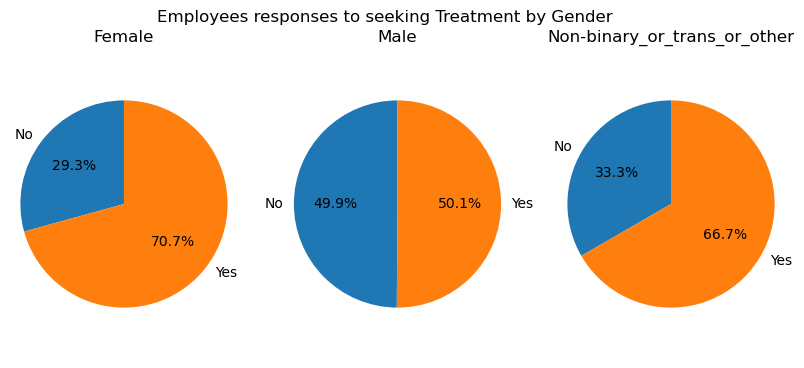

In [ ]:
# Group the data by treatment and gender, and count the number of responses in each group
counts = data.groupby(['treatment', 'Gender']).size().reset_index(name='counts')

# Create a pivot table to format the data for plotting
pivot = pd.pivot_table(counts, values='counts', index='Gender', columns='treatment')

# Create a pie chart for each gender
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs = axs.flatten()
colors = ['tab:blue', 'tab:orange']

for i, Gender in enumerate(['Female', 'Male', 'Non-binary_or_trans_or_other']):
    pie = axs[i].pie(pivot.loc[Gender], colors=colors, labels=pivot.columns, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(Gender)
    axs[i].axis('equal')

fig.suptitle('Employees responses to seeking Treatment by Gender')
plt.show()

##### **Analysis of these pie charts:**

These pie charts depict the gender differences in the employees that seek or don't seek treatment for their mental illnesses. The graph shows an interesting discrepancy of how men don't seek treatment as much as women or other genders do. I think this could highlight how employers may need to have more awareness and support for men in their mental health and wellness. Additionally, it could also point to how men working in tech should be encouraged to seek help more often and care about their wellness from a mental health point of view too.


#### Do employees know of their care options at work?

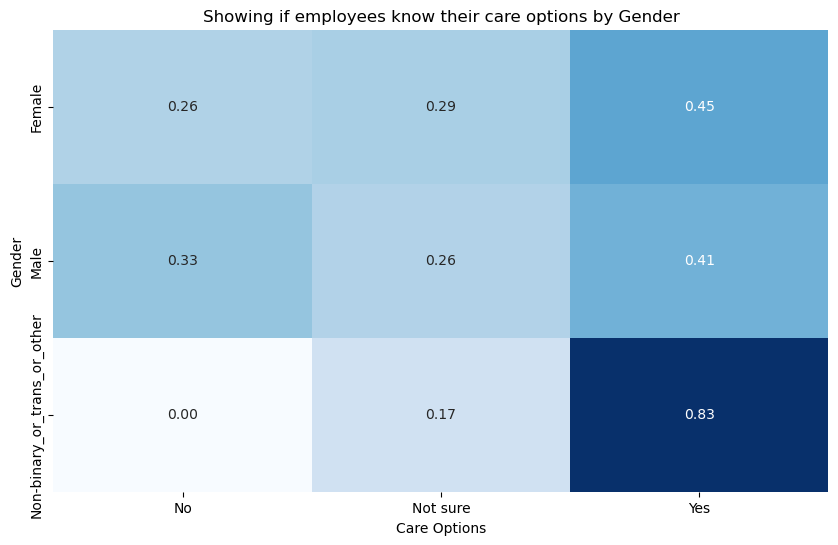

In [ ]:
ct = pd.crosstab(data['Gender'], data['care_options'], normalize='index')

# Create the heat map
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(ct, annot=True, cmap='Blues', fmt='.2f', cbar=False, ax=ax)
ax.set_xlabel('Care Options')
ax.set_ylabel('Gender')
ax.set_title('Showing if employees know their care options by Gender')

plt.show()

#### Using the active care column to get a visualization of both columns together as an analysis to explore how gender varies amongst employees taking care of their own mental health at work

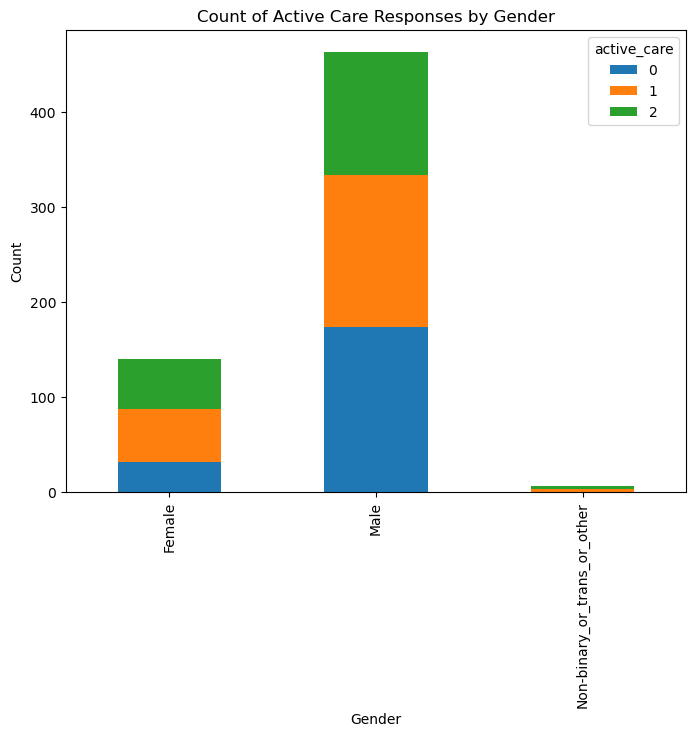

In [ ]:
# Group the data by gender and Active care column
active_care_gender = data.groupby(['Gender', 'active_care'])['active_care'].count().unstack()

# Plot the data
ax = active_care_gender.plot(kind='bar', stacked=True, figsize=(8,6))

# Set the axis labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Count of Active Care Responses by Gender')

# Show the plot
plt.show()

#### What about the stigma and fear people may have talking about their mental health issues?
- Is there a relationship between the gender of the employees in the tech industry and if they think that discussing their mental health issues will have a negative effect on their employment?

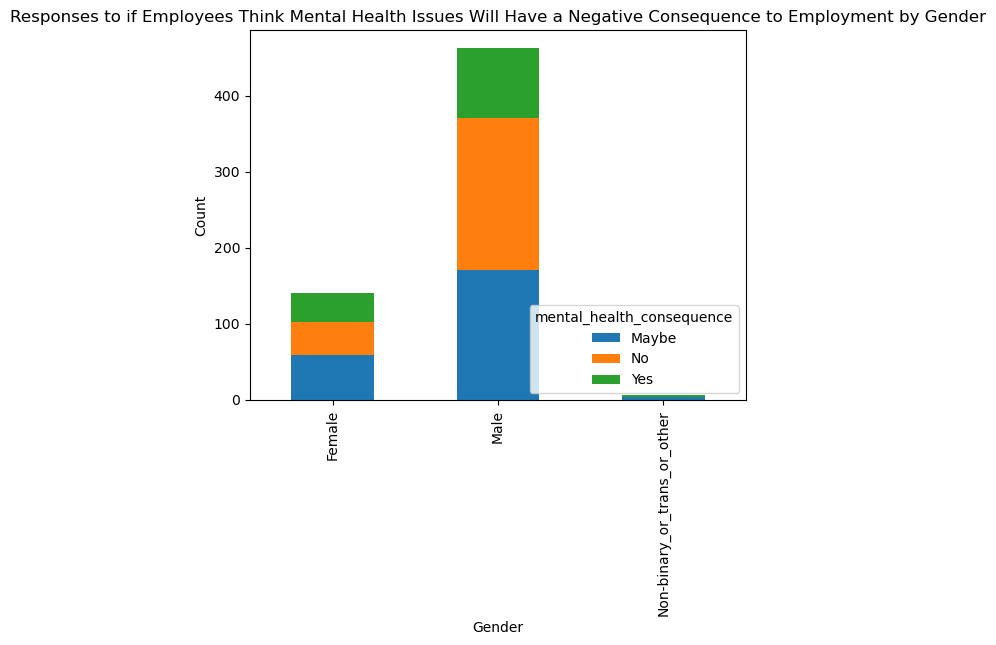

In [ ]:
data.groupby(['Gender', 'mental_health_consequence']).size().unstack().plot(kind='bar', stacked=True)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Responses to if Employees Think Mental Health Issues Will Have a Negative Consequence to Employment by Gender')
plt.show()

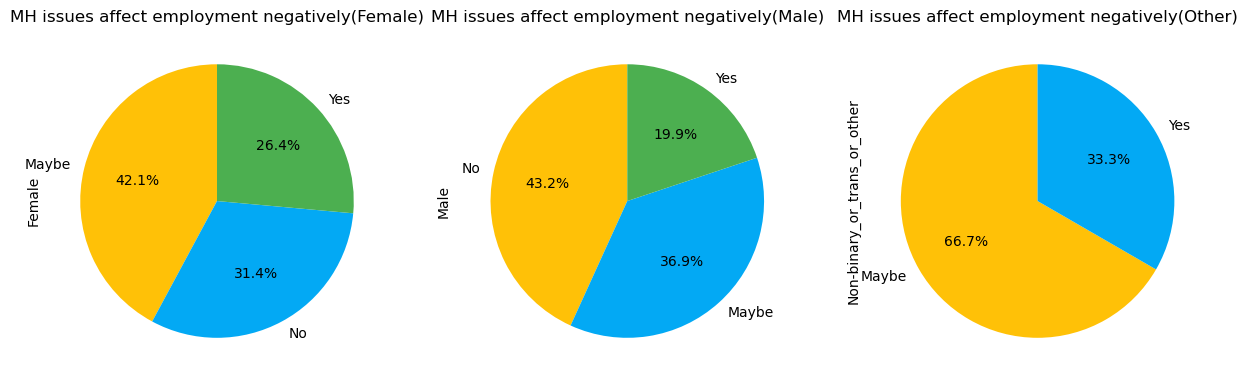

In [ ]:
#trying this as a pie chart instead
colors = ['#FFC107', '#03A9F4', '#4CAF50']
df_female = data[data['Gender'] == 'Female']
df_male = data[data['Gender'] == 'Male']
df_other= data[data['Gender'] == 'Non-binary_or_trans_or_other']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

df_female['mental_health_consequence'].value_counts().plot(kind='pie', ax=axs[0], autopct='%1.1f%%', startangle=90, colors=colors)
axs[0].set_ylabel('Female')
axs[0].set_title('MH issues affect employment negatively(Female)')

df_male['mental_health_consequence'].value_counts().plot(kind='pie', ax=axs[1], autopct='%1.1f%%', startangle=90, colors=colors)
axs[1].set_ylabel('Male')
axs[1].set_title('MH issues affect employment negatively(Male)')


df_other['mental_health_consequence'].value_counts().plot(kind='pie', ax=axs[2], autopct='%1.1f%%', startangle=90, colors=colors)
axs[2].set_ylabel('Non-binary_or_trans_or_other')
axs[2].set_title('MH issues affect employment negatively(Other)')

plt.show()

##### **Analysis of these pie charts:**
I think these pie charts show that more women feel that sharing their mental health issues at work will have a negative effect on their employment rather than men. And there is much bigger number of agreement on this negative consequence on the employees that identify as Non-binary or trans or other genders except male or female. I think pie charts turn out to be a better way to compare and visualize this data and draw correlations and conclusions from rather than the stacked bar charts.

#### Now to think about the employers themselves providing good care for their employees.
- Is there a relationship between the gender of employees and how they think their employer thinks of the seriousness of mental illnesses and compared to physical

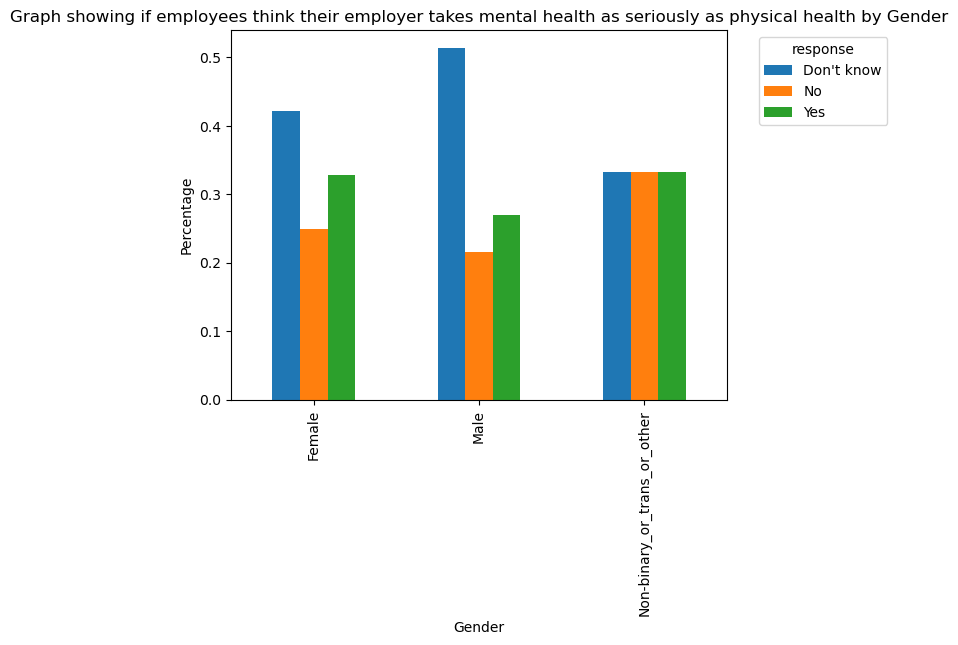

In [ ]:
counts = pd.crosstab(data['Gender'], data['mental_vs_physical'], normalize='index')

# Create a grouped bar chart of the counts for each gender
counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Graph showing if employees think their employer takes mental health as seriously as physical health by Gender')
plt.legend(title='response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### **Analysis:**
This grouped bar chart shows a remarkable amount of 'Don't knows' as response to their employers taking physical illness as seriously as mental illness. It seems to be in similar numbers across all three categories of the Genders the dataset has been divided into. 

#### Wellness Programs provided by employers:
- Is there a relationship between the gender of the employee and if their employer has ever discussed mental health as part of an employee wellness program?

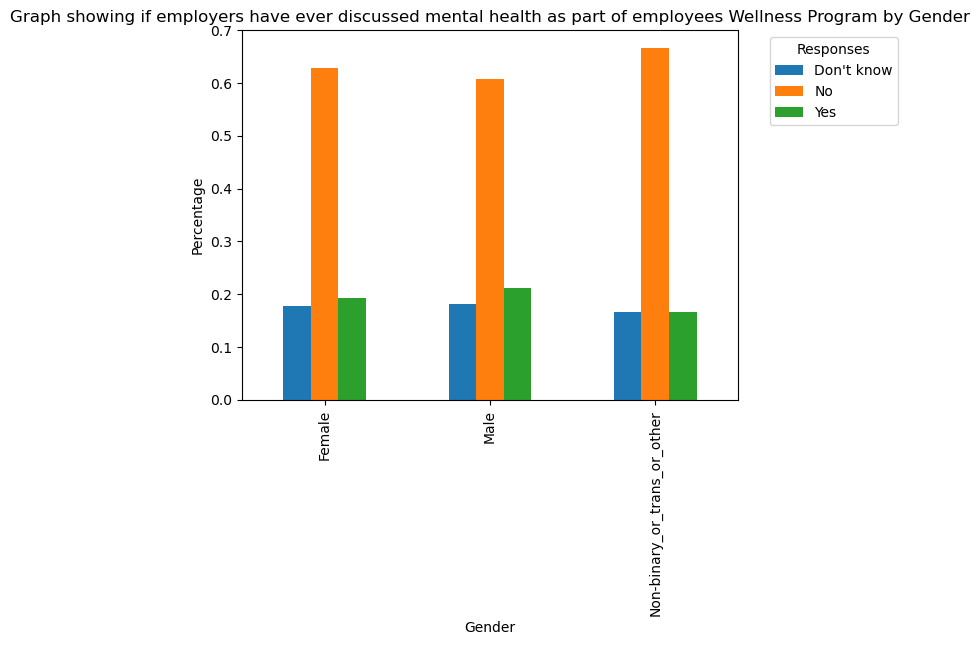

In [ ]:
# Use crosstab to count the number of occurrences of each response in wellness_program
counts = pd.crosstab(data['Gender'], data['wellness_program'], normalize='index')

# Create a side-by-side bar chart of the counts for each gender
ax = counts.plot(kind='bar')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.set_title('Graph showing if employers have ever discussed mental health as part of employees Wellness Program by Gender')
ax.legend(title='Responses', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### **Analysis:**


#### Do employers provide mental health benefits for their employees and how does this differ by Gender

<Axes: xlabel='benefits', ylabel='count'>

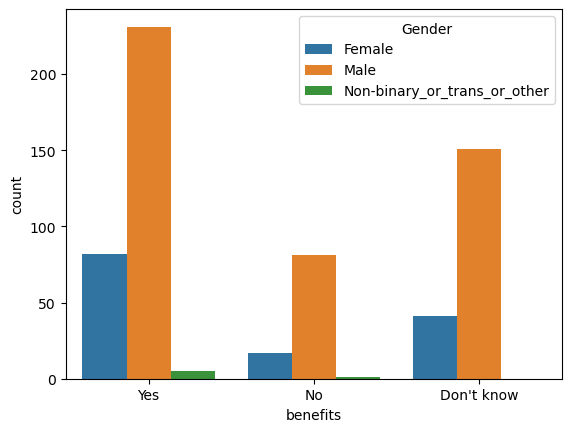

In [ ]:

sns.countplot(x="benefits", hue="Gender", data=data)

#### **Analysis:**


In [ ]:
# I should also save this cleaned file again as I have renamed the Gender column more accordingly and processed it further

from pathlib import Path  
filepath = Path('../data/processed/analysis_2_data_pt2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath, index= False)